# **ANÁLISIS EXPLORATORIO DE LOS DATOS**

In [4]:
# Librerias Necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files


In [5]:
# Cargar la base de datos

uploaded = files.upload()
diabetes = pd.read_csv("diabetes.csv")

Saving diabetes.csv to diabetes (1).csv


In [6]:
# Tipo de dato

print(type(diabetes))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# Visualizacion de los primeros 5 registros

print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
# Dimension de la base de datos

print(diabetes.shape)

(768, 9)


In [10]:
# Detalles de cada columna

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Caracteristicas descriptivas basicas

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Informacion de la deteccion de diabetes

diabetes["Outcome"].value_counts().to_frame()

,Outcome
0,500
1,268


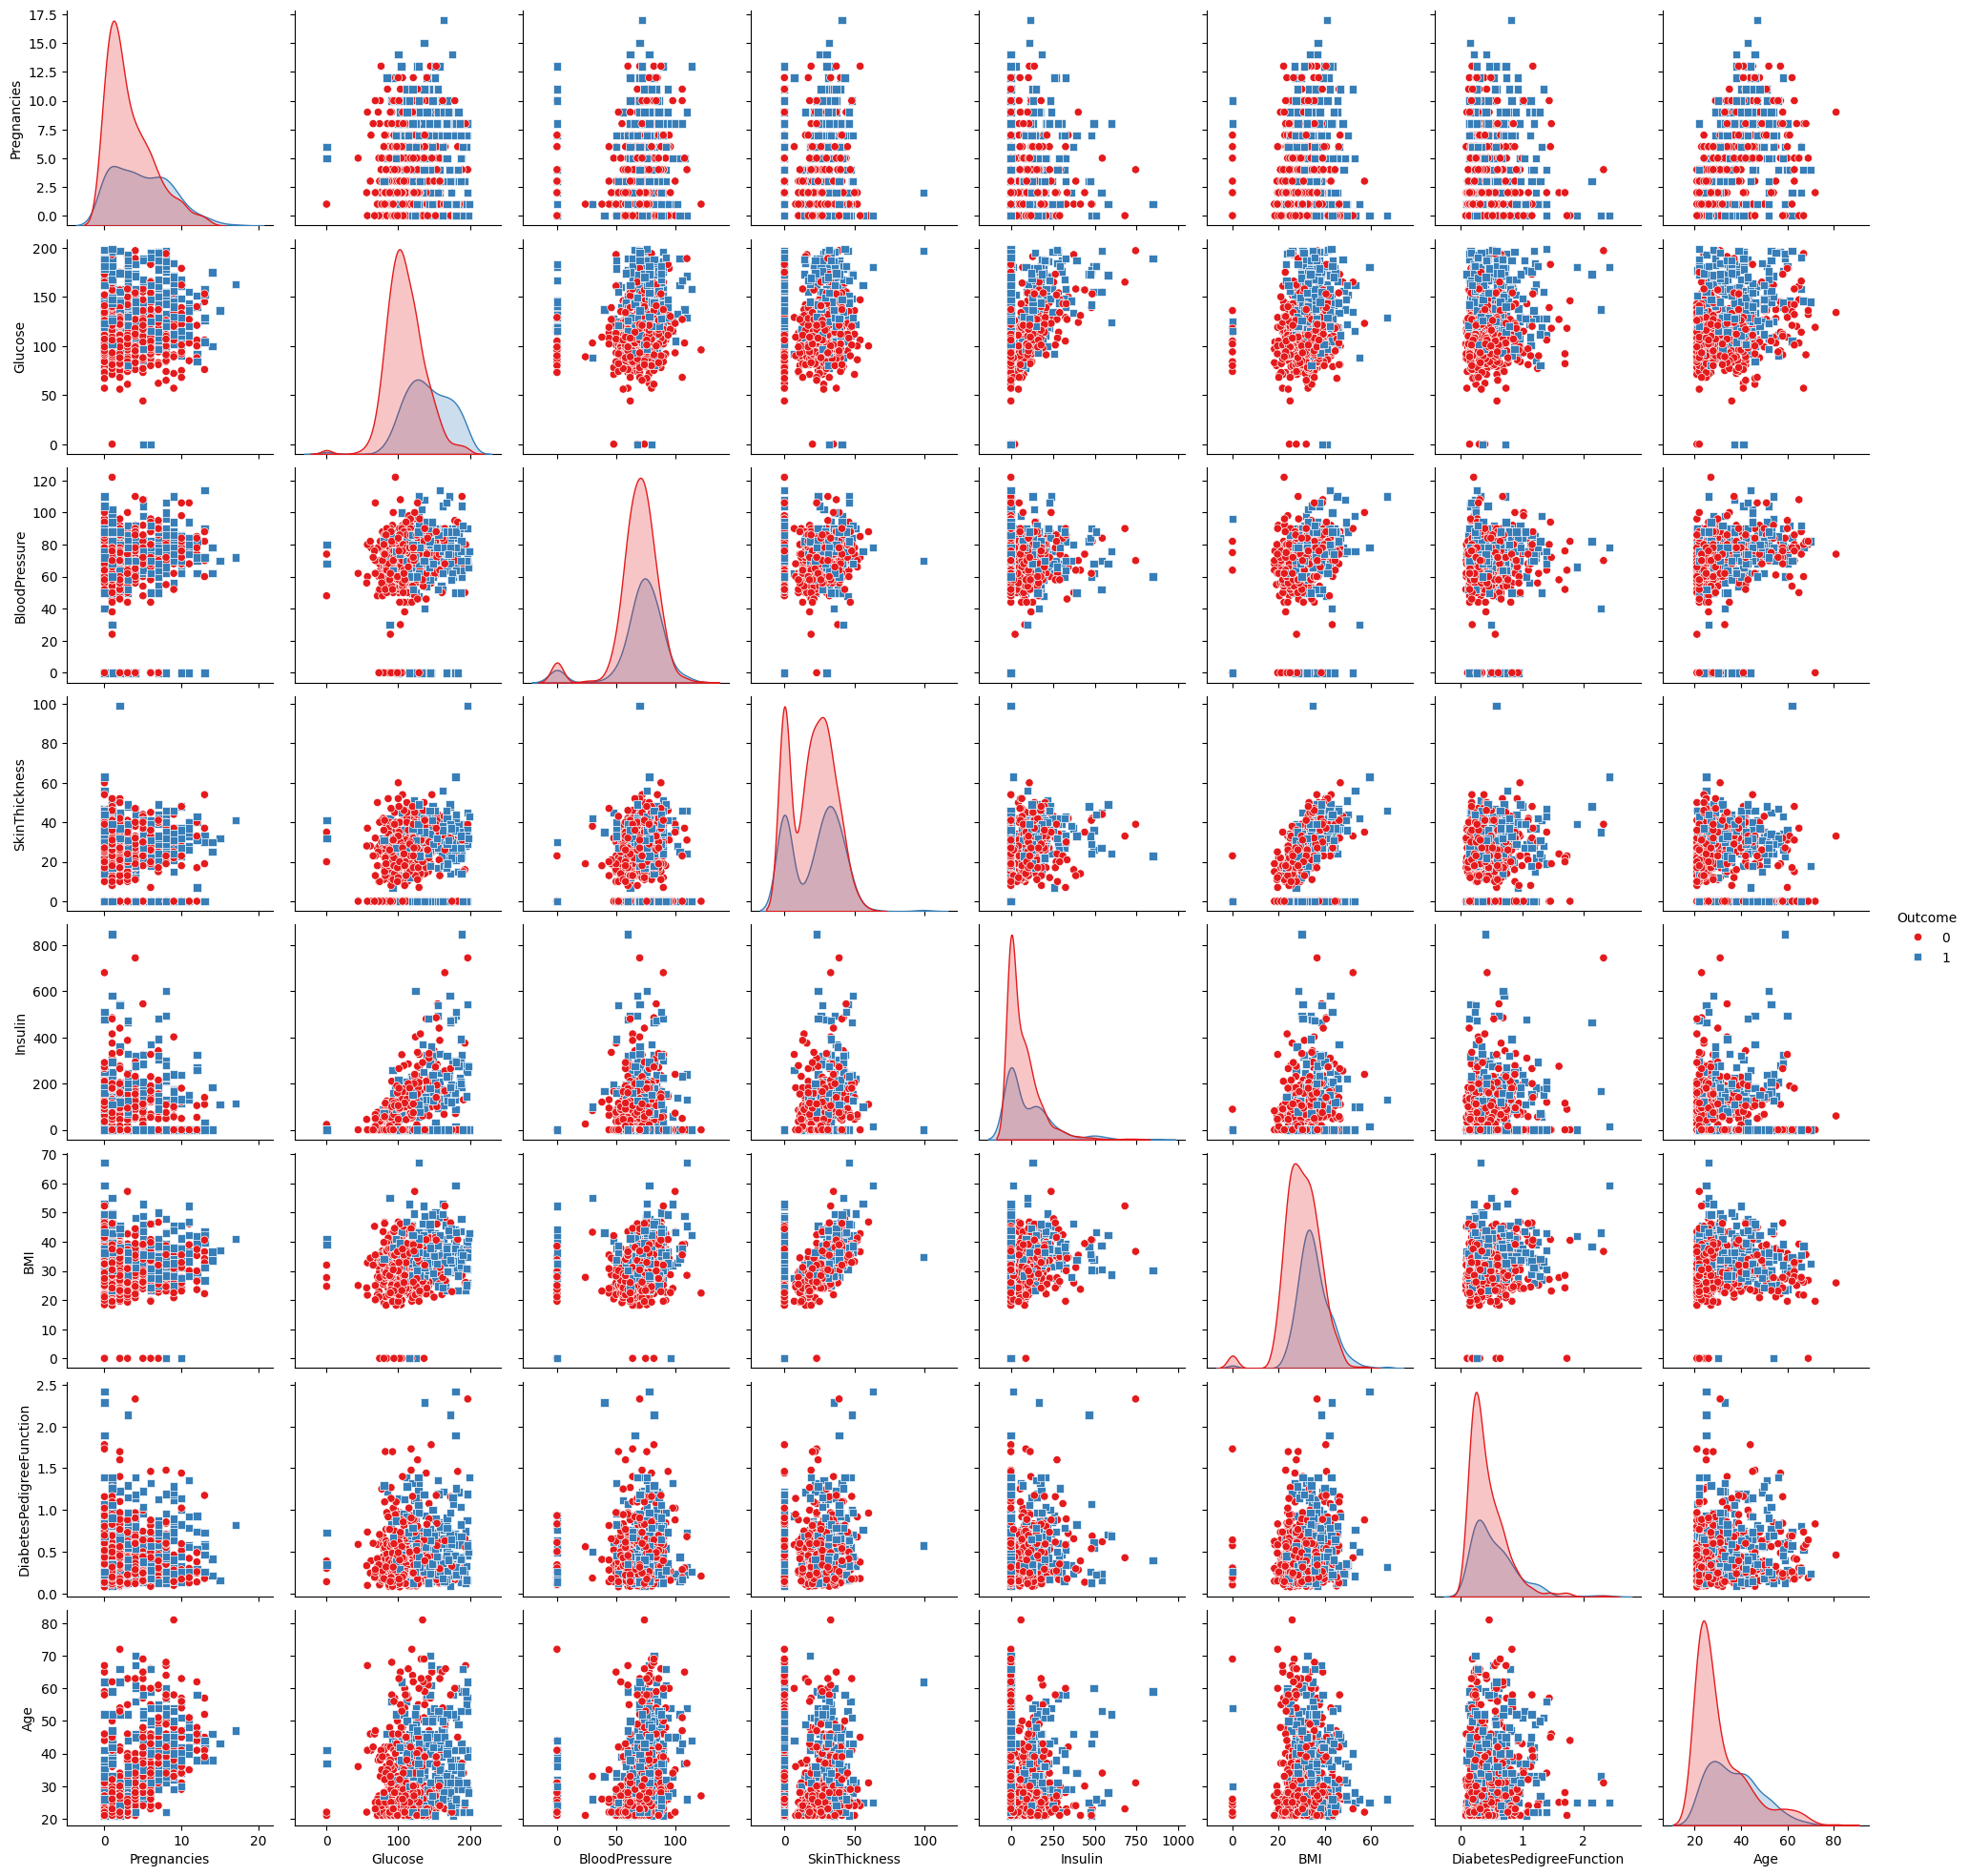

In [19]:
#  Pair plot

sns.pairplot(diabetes, hue="Outcome", markers=["o", "s"], palette="Set1")

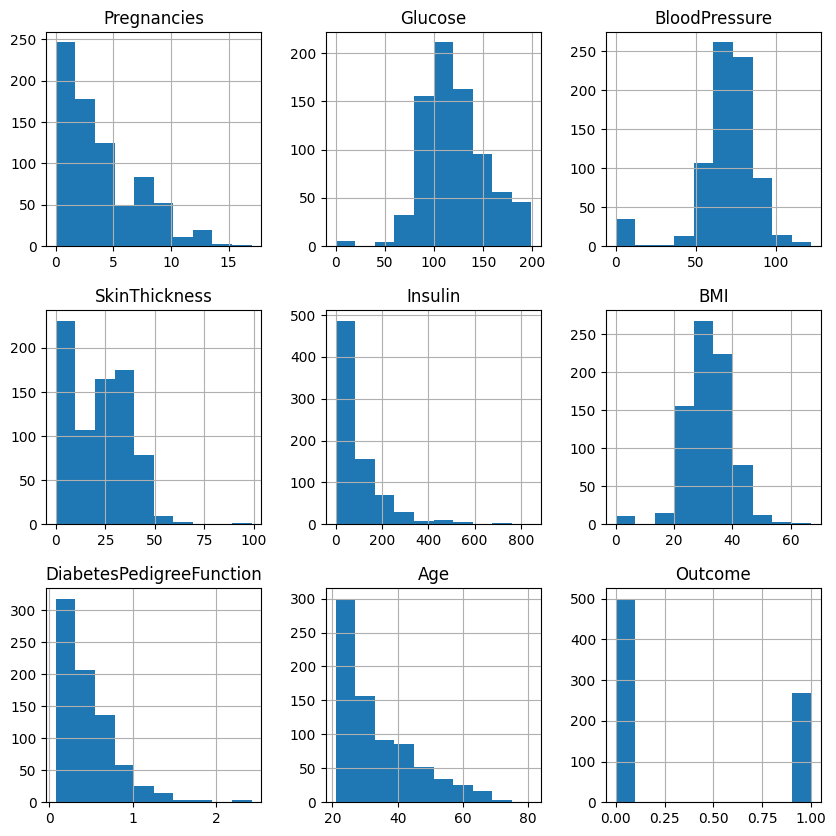

In [12]:
# Histograma de las caracteristicas globales

diabetes.hist(figsize = (10,10),bins=10)
plt.show()

In [25]:
# Busqueda de duplicados

print(diabetes[diabetes.duplicated()])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [29]:
# Deteccion de los valores inapropiados y cambiados por la media

diabetes.loc[diabetes['Glucose'] == 0, 'Glucose'] = diabetes['Glucose'].median()
diabetes.loc[diabetes['BloodPressure'] == 0, 'BloodPressure'] = diabetes['BloodPressure'].median()
diabetes.loc[diabetes['SkinThickness'] == 0, 'SkinThickness'] = diabetes['SkinThickness'].median()
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = diabetes['BMI'].median()
diabetes.loc[diabetes['Insulin'] == 0, 'Insulin'] = diabetes['Insulin'].median()


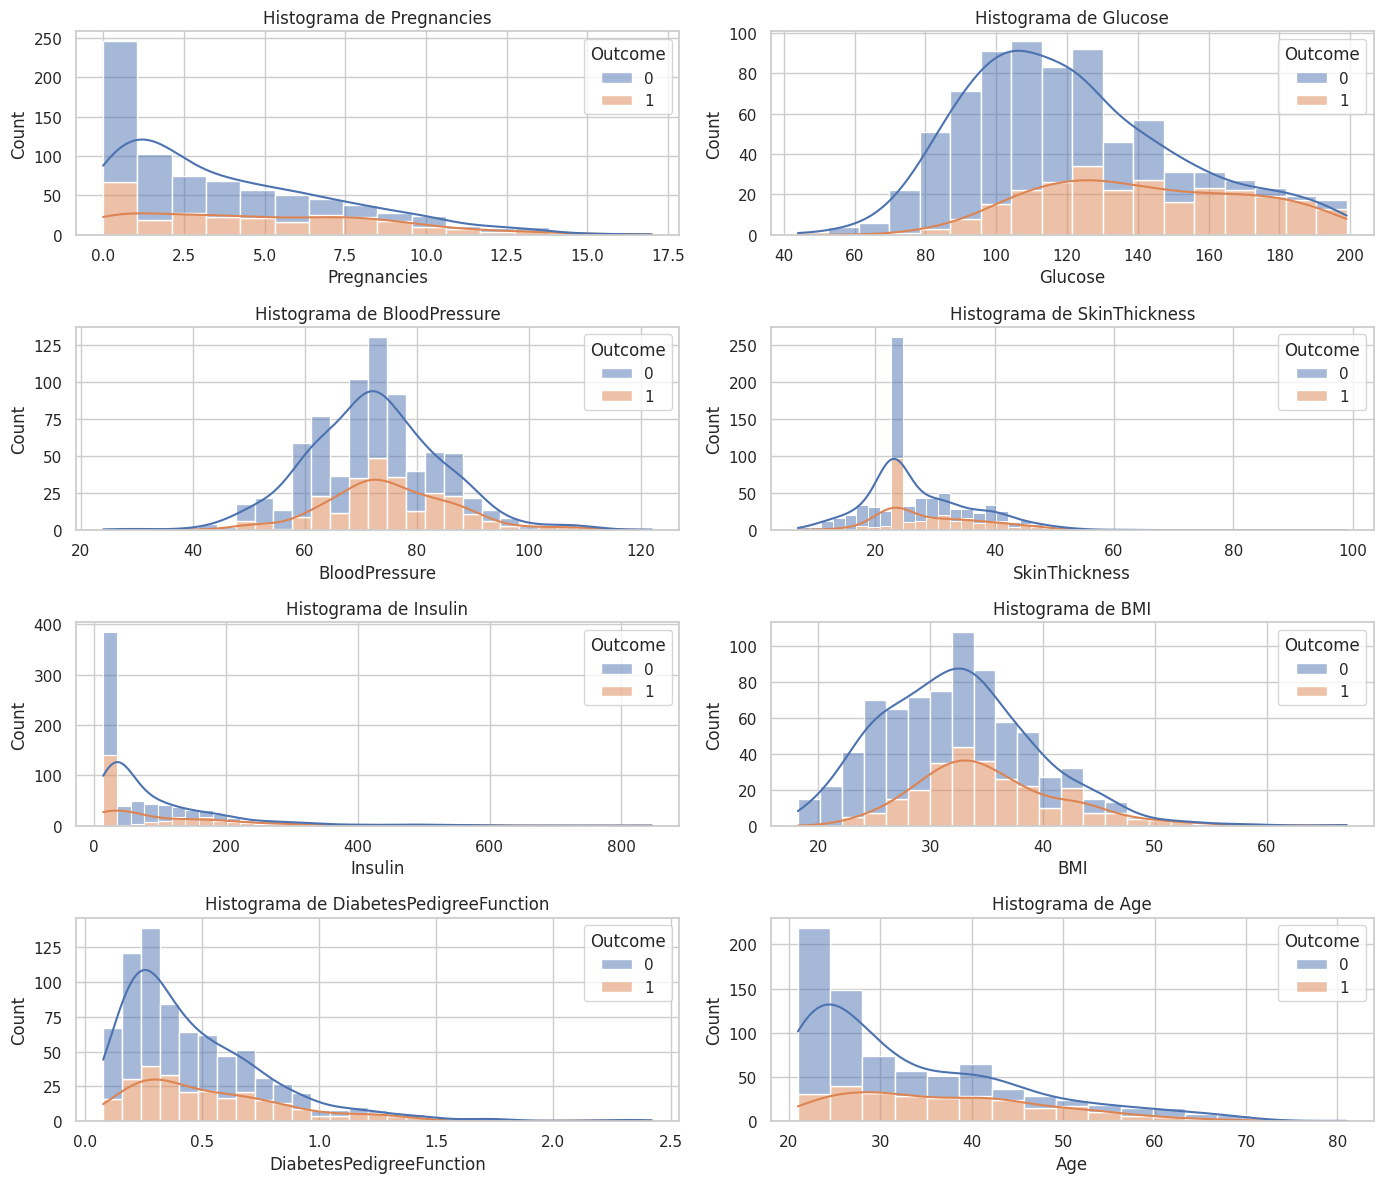

In [32]:
# histograma de cada una de las características para las clases presentes

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

for i, column in enumerate(diabetes.columns[:-1]):
    row, col = divmod(i, 2)
    sns.histplot(data=diabetes, x=column, hue='Outcome', multiple='stack', ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

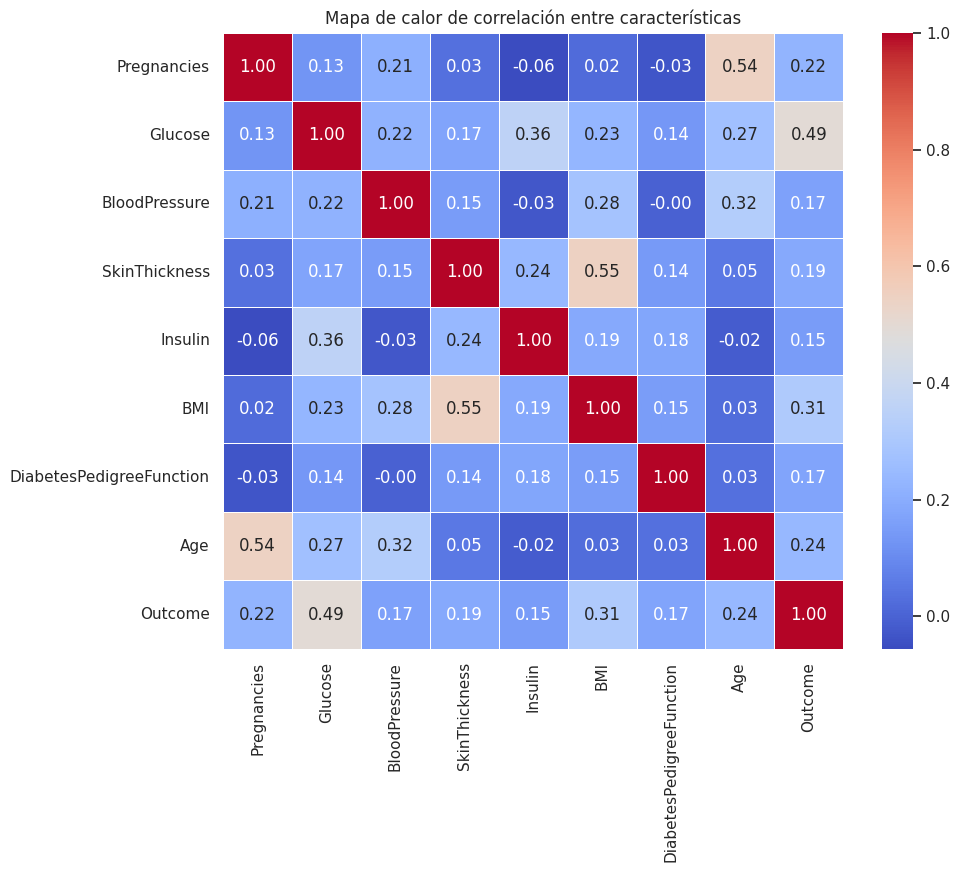

In [34]:
# Mapa de calor

correlation_matrix = diabetes.corr()

sns.set(style="white")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación entre características')
plt.show()

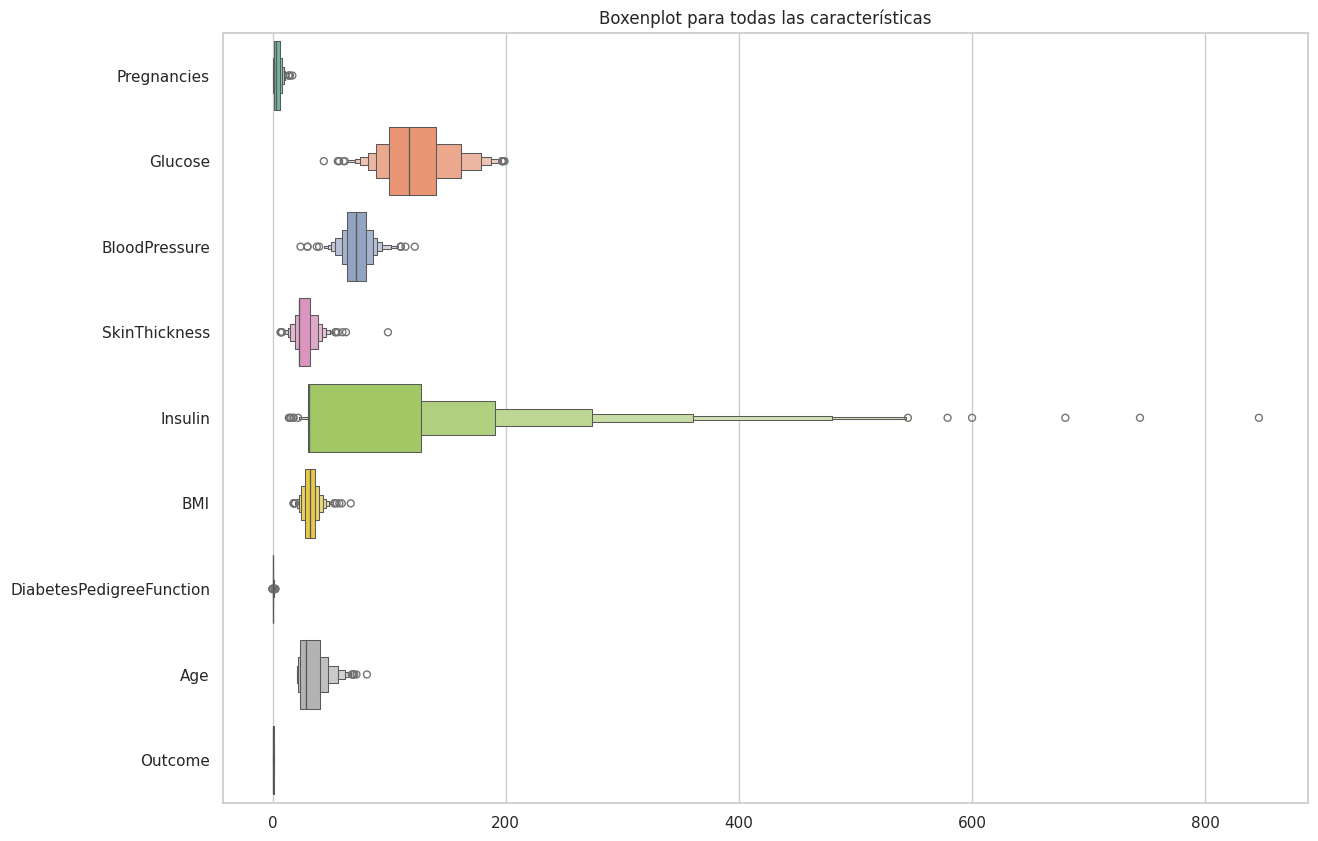

In [36]:
# gráfico tipo Boxenplot

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))
sns.boxenplot(data=diabetes, orient="h", palette="Set2")
plt.title('Boxenplot para todas las características')
plt.show()

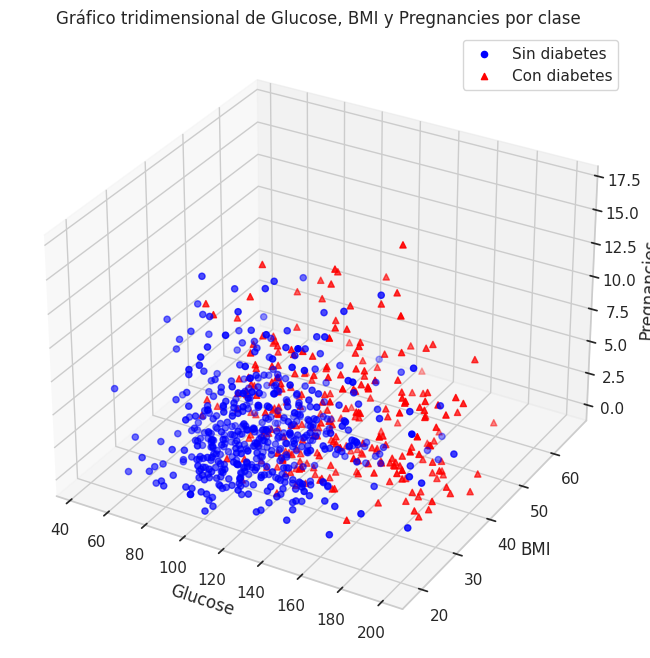

In [37]:
# gráfico tridimensional

clase_0 = diabetes[diabetes['Outcome'] == 0]
clase_1 = diabetes[diabetes['Outcome'] == 1]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clase_0['Glucose'], clase_0['BMI'], clase_0['Pregnancies'], label='Sin diabetes', c='blue', marker='o')

ax.scatter(clase_1['Glucose'], clase_1['BMI'], clase_1['Pregnancies'], label='Con diabetes', c='red', marker='^')

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')

plt.title('Gráfico tridimensional de Glucose, BMI y Pregnancies por clase')

ax.legend()

plt.show()

# **Preguntas**

* **¿El dataset cuenta con registros duplicados?, ¿Por qué es crucial identificar y manejar los valores duplicados en un conjunto de datos?**

   R// No, usando la funcion duplicated(), nos damos cuenta de que el dataset no cuenta con registro duplicados. Es muy importante evitarlos pues la presencia de valores duplicados puede distorsionar resultados y llevar a conclusiones erróneas. Eliminar duplicados mejora la precisión y eficiencia del procesamiento de datos, ahorra recursos y tiempo. Además,mejora la calidad general de los datos, evitando posibles problemas o inconsistencias. Permitiendo una identificación mas clara de patrones y tendencias.

* **¿El dataset cuenta con valores nulos? Realizando un análisis rápido mediante al resultado arrojado mediante la función .describe() de su DataFrame, ¿Podría identificar si hay valores nulos presentes en el dataset, justifique su respuesta?**

    R// Si, mediante la funcion .describe() se puede evidenciar que hay valores nulos presentes en el dataset, esto es debido a por ejemplo que en la columna del indice de masa corporal hay un valor minimo de 0 lo cual es imposible.

* **Una vez identificado la cantidad de valores nulos presentes en su dataset, ¿Qué sugeriría para rellenar los valores faltantes?, justifique su respuesta y ejecútelo en código explicando lo que ha realizado.**

    R// Mi sujerencia es que se utilice la mediana de cada columna reemplazando los valores invalidos ( el 0 ) en los casos donde corresponda, para esto el codigo se utiliza la funcion loc() para localizar donde se encuentran esos valores invalidos y reemplazarlos con la mediana

* **Realice un único gráfico donde presente el histograma de cada una de las características para las clases presentes, es decir al final debe de obtener un gráfico tipo subplot con 8 histogramas (Cada histograma de cada característica y a su vez de cada clase). Ejecútelo en código.**

    R// Listo

* **Realice una correlación de las características presentes al DataFrame y preséntelo en forma gráfica mediante un mapa de calor ¿Qué operación matemática se usa? ¿Qué puede concluir comparando con el resultado obtenido en el ítem 4?.**
    R// con el mapa de calor de correlación, se puede obtener información sobre la relación lineal entre las diferentes características. Un valor de correlación cercano a 1 o -1 indica una relación fuerte, mientras que un valor cercano a 0 indica una relación débil o nula. Por lo anterior se pueden ver fuertes relaciones entre por ejemplo los niveles de glucosa y el resultado, o tambien el indice de masa corporal y el grosor de la piel. Ademas, que en general hay debiles correlaciones.

* **Realizar un gráfico tipo Boxenplot para todas las características.**

    R// Listo

* **Realizar un gráfico tridimensional donde el eje x sea toda la característica “Glucose”, el eje y “BMI” y el eje z “Pregnancies” para las dos clases.**

    R// Listo